  # Лабораторная работа №4. Автокодировщик

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt


In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

Создаём класс Автоэнкодера. Задаём по 3 слоя на энкодер и декодер. Выход энкодера - сигмоида (значение [0,1]).

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

Используем оптимайзер Адам и среднеквадратичную ошибку MSE

In [4]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Тренируем автоэнкодер

In [5]:
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(torch.device('cpu'))
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/10], Loss: 0.0425
Epoch [2/10], Loss: 0.0309
Epoch [3/10], Loss: 0.0285
Epoch [4/10], Loss: 0.0241
Epoch [5/10], Loss: 0.0215
Epoch [6/10], Loss: 0.0216
Epoch [7/10], Loss: 0.0202
Epoch [8/10], Loss: 0.0198
Epoch [9/10], Loss: 0.0203
Epoch [10/10], Loss: 0.0189


Тестируем модель

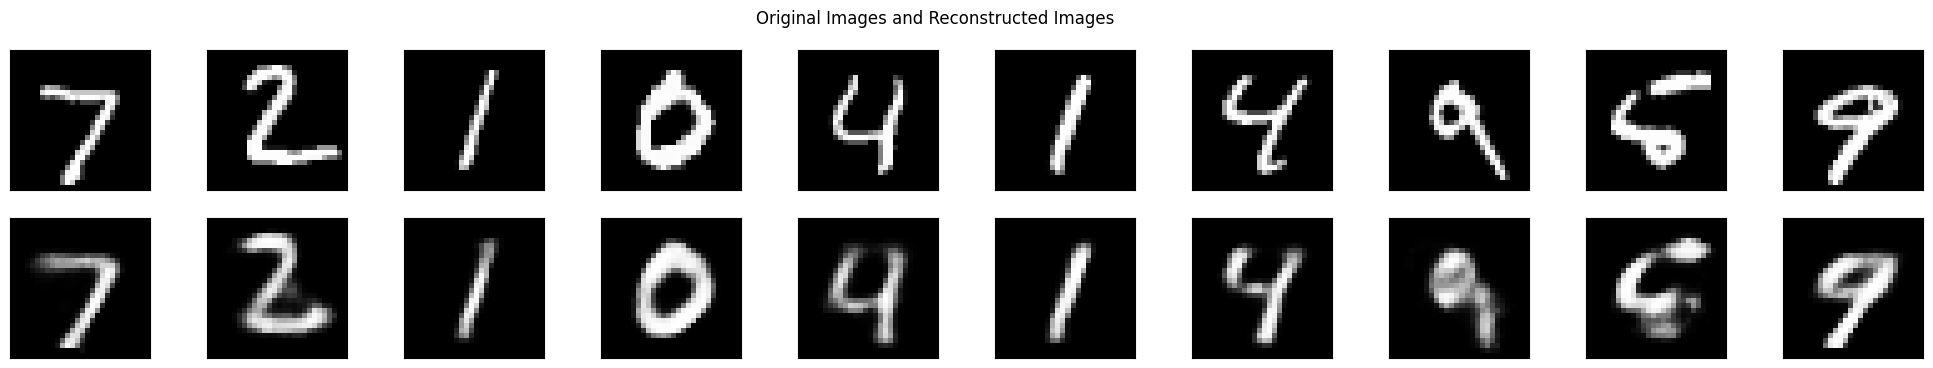

Test Loss: 0.0182


In [13]:
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.to(torch.device('cpu'))
        output = model(img)
        loss = criterion(output, img)
        fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
        for images, row in zip([img, output], axes):
            for img, ax in zip(images, row):
                ax.imshow(img[0], cmap='gray')
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
        fig.suptitle('Original Images and Reconstructed Images')
        plt.show()
        print('Test Loss: {:.4f}'.format(loss.item()))
        break

In [1]:
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.to(torch.device('cpu'))
        encoded = model.encoder(img.view(-1, 28*28))
        output = model.decoder(encoded)
        loss = criterion(output, img)
        fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(25, 6))
        for images, row in zip([img, encoded, output], axes):
            for img, ax in zip(images, row):
                if images is encoded:
                    ax.imshow(img.unsqueeze(0).reshape(4, 4), cmap='gray')
                else:
                    ax.imshow(img[0], cmap='gray')
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
        fig.suptitle('Original Images, Encoded Images, and Reconstructed Images')
        plt.show()
        print('Test Loss: {:.4f}'.format(loss.item()))
        break


NameError: name 'torch' is not defined